<a href="https://colab.research.google.com/github/Amirrezahmi/Video-Inpainting-and-Voice-Cloning/blob/main/video%20inpainting/image%20inpainting/Copy_of_in_painting_with_stable_diffusion_using_%F0%9F%A7%A8diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-painting pipeline for Stable Diffusion using 🧨 Diffusers

This notebook shows how to do text-guided in-painting with Stable Diffusion model using  🤗 Hugging Face [🧨 Diffusers library](https://github.com/huggingface/diffusers).

For a general introduction to the Stable Diffusion model please refer to this [colab](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb).

In [ ]:
!pip install -qq -U diffusers==0.11.1 transformers ftfy gradio accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.9 MB/

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.2 MB/s eta 0:00:00


In [ ]:
!pip install transformers

To use private and gated models on 🤗 Hugging Face Hub, login is required. If you are only using a public checkpoint (such as `runwayml/stable-diffusion-inpainting` in this notebook), you can skip this step.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline

In [ ]:
device = "cuda"
model_path = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
).to(device)

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 24 files:   0%|          | 0/24 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
import requests
from io import BytesIO

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")



In [ ]:
from PIL import Image

# Open an image file
with Image.open('img.jpg') as img:
    # Resize the image
    image = img.resize((512, 512))

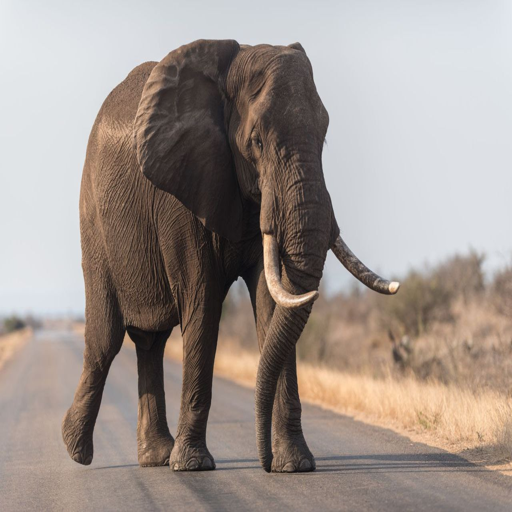

In [ ]:
image

make the mask

In [ ]:
from transformers import pipeline
import numpy as np
import cv2
from PIL import Image

# Load the image
image_path = image

# Segment the image
model = pipeline("image-segmentation")
results = model(image_path)

# Print the labels with their indices
label_to_index = {result['label']: i for i, result in enumerate(results)}
print(label_to_index)

labels_input = input("Enter the labels to keep, separated by space: ")
labels = labels_input.split()

indices = [label_to_index[label] for label in labels]

# Initialize a binary mask with all zeros
combined_binary_mask = np.zeros_like(np.array(results[0]["mask"]))

for index in indices:
    # Convert the mask to a numpy array
    mask_array = np.array(results[index]["mask"])

    # Apply a threshold to convert the grayscale mask to binary
    threshold = 128  # Adjust this threshold value as needed
    binary_mask = np.where(mask_array >= threshold, 255, 0).astype(np.uint8)

    # Combine the binary masks using the logical OR operation
    combined_binary_mask = np.logical_or(combined_binary_mask, binary_mask)

# Convert the combined binary mask to uint8
combined_binary_mask = combined_binary_mask.astype(np.uint8) * 255

# Apply the binary mask to the image
image = np.array(image)
result = cv2.bitwise_and(image, image, mask=combined_binary_mask)


# Convert the result to grayscale
gray_result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Convert the grayscale result to binary
(thresh, binary_result) = cv2.threshold(gray_result, 1, 255, cv2.THRESH_BINARY)

# Convert the binary result to RGB
binary_result_rgb = cv2.cvtColor(binary_result, cv2.COLOR_GRAY2RGB)

# Convert the binary result to PIL image
result_image = Image.fromarray(binary_result_rgb)

# Save or display the result image
result_image.save("object_white_background_black.jpg")
result_image.show()

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision fc15262 (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrFor

{'LABEL_187': 0, 'road': 1, 'LABEL_184': 2, 'elephant': 3, 'LABEL_193': 4}
Enter the labels to keep, separated by space: elephant


In [ ]:
from PIL import Image

# Open an image file
with Image.open("object_white_background_black.jpg") as img:
    # Resize the image
     mask_image = img.resize((512, 512))

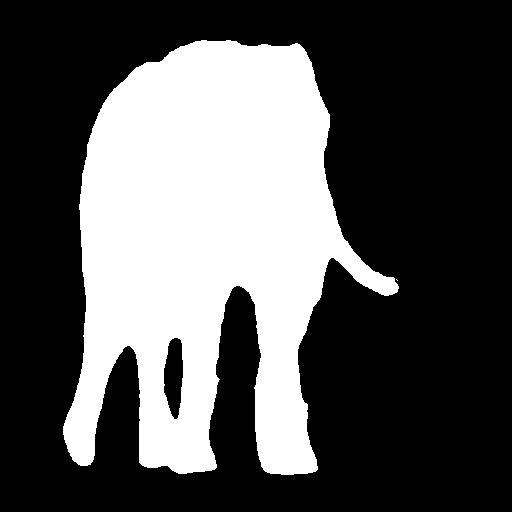

In [ ]:
mask_image

In [ ]:
prompt = "a dragon with lion head"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# insert initial image in the list so we can compare side by side
images.insert(0, image)

In [ ]:
images = [Image.fromarray(img) if type(img) is np.ndarray else img for img in images]

In [ ]:
print(type(images))
print(images)

<class 'list'>
[<PIL.Image.Image image mode=RGB size=512x512 at 0x7AD41DE95330>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7AD41C827E50>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7AD41C827250>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7AD41C827070>]


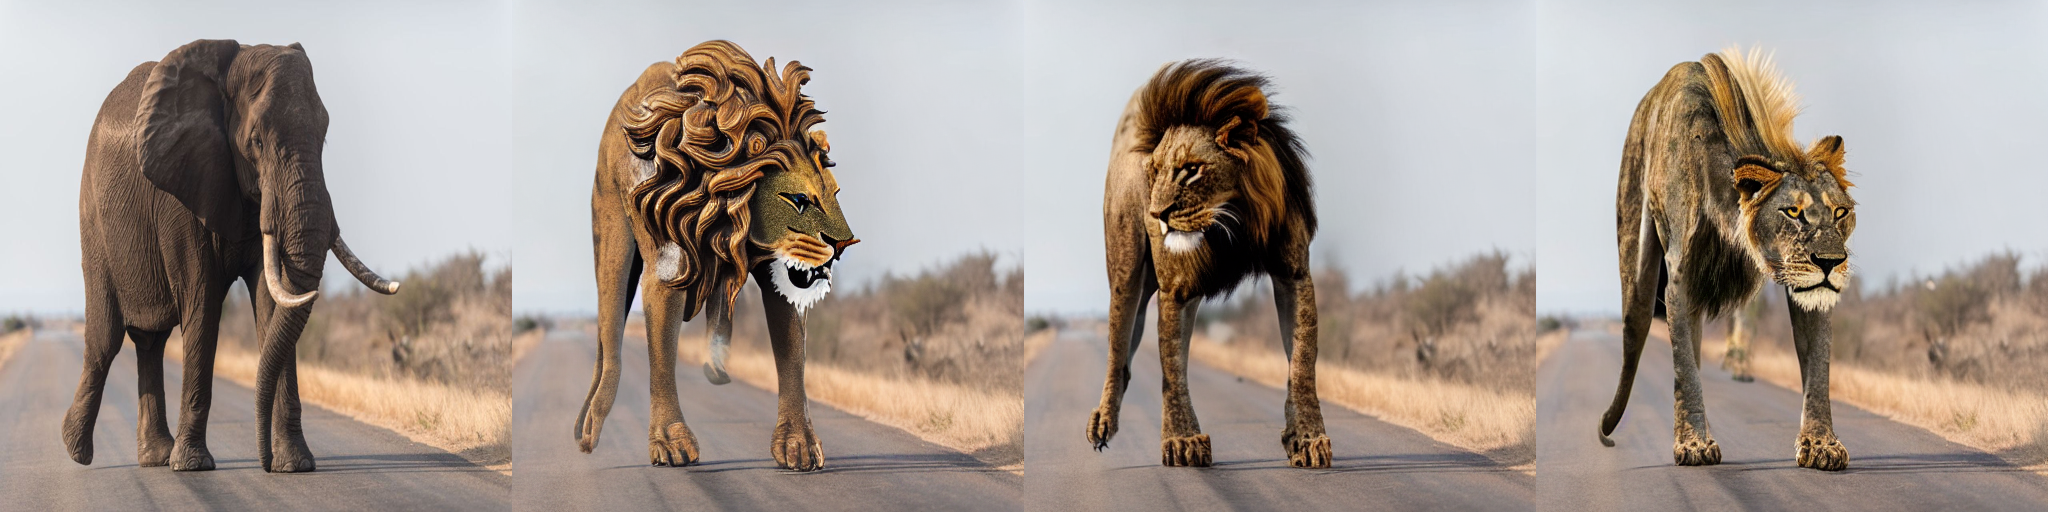

In [ ]:
image_grid(images, 1, num_samples + 1)

In [ ]:
# save the one u want
images[1].save('like.jpg')

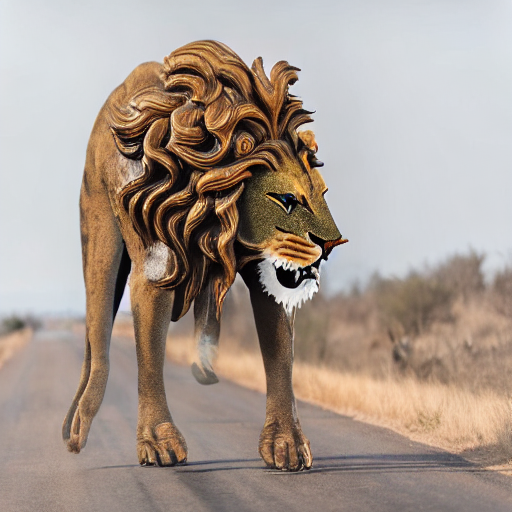

In [ ]:
images[1] # i really like this one ;)